In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

train_path = '/content/drive/MyDrive/Dataset/Train'
val_path = '/content/drive/MyDrive/Dataset/Validate'

# Check image counts in the updated dataset to make sure i accounted for the mismatched images i added
for folder in ['Flood', 'Earthquake']:
    train_folder = os.path.join(train_path, folder)
    val_folder = os.path.join(val_path, folder)
    print(f"Train {folder}: {len(os.listdir(train_folder))}")
    print(f"Validation {folder}: {len(os.listdir(val_folder))}")


Train Flood: 759
Validation Flood: 161
Train Earthquake: 756
Validation Earthquake: 161


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_data = train_data_gen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Validation data (no augmentation, just rescaling)
val_data_gen = ImageDataGenerator(rescale=1./255)

val_data = val_data_gen.flow_from_directory(
    val_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 1515 images belonging to 2 classes.
Found 322 images belonging to 2 classes.


In [ ]:
# Load the previously trained model
model = load_model('/content/drive/MyDrive/Dataset/flood_earthquake_classifier.h5')

# Compile the model for fine-tuning with a low learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tuning our model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_steps=len(val_data)
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 393s 7s/step - accuracy: 0.9081 - loss: 0.2532 - val_accuracy: 0.8602 - val_loss: 0.3237
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 329ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 279s 5s/step - accuracy: 0.9133 - loss: 0.2326 - val_accuracy: 0.8571 - val_loss: 0.3212
Epoch 4/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 250s 5s/step - accuracy: 0.9091 - loss: 0.2435 - val_accuracy: 0.8602 - val_loss: 0.3200


In [ ]:
test_data_gen = ImageDataGenerator(rescale=1./255)

test_data = test_data_gen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/Test',
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

Found 306 images belonging to 2 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


306/306 ━━━━━━━━━━━━━━━━━━━━ 51s 163ms/step - accuracy: 0.9458 - loss: 0.2593
Test Loss: 0.31345948576927185
Test Accuracy: 0.9019607901573181


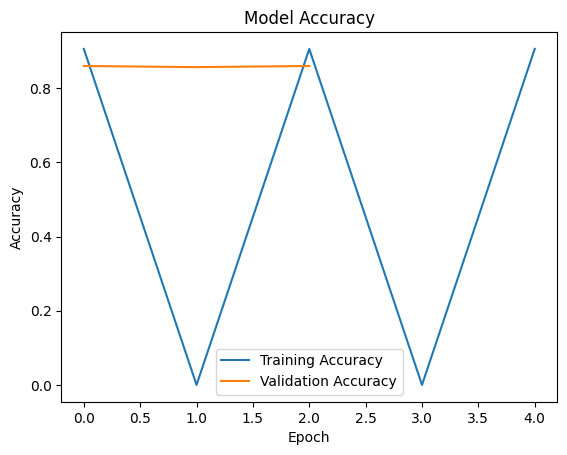

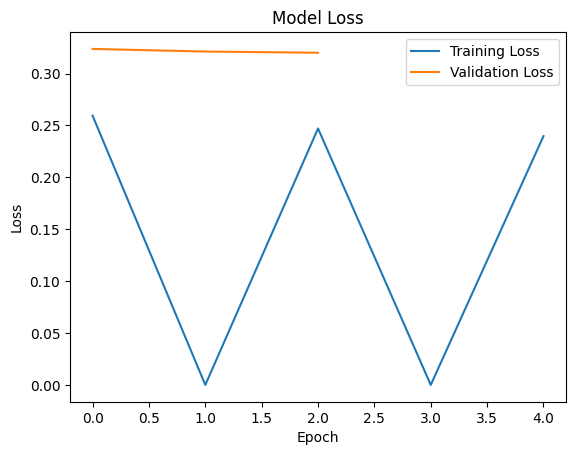

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


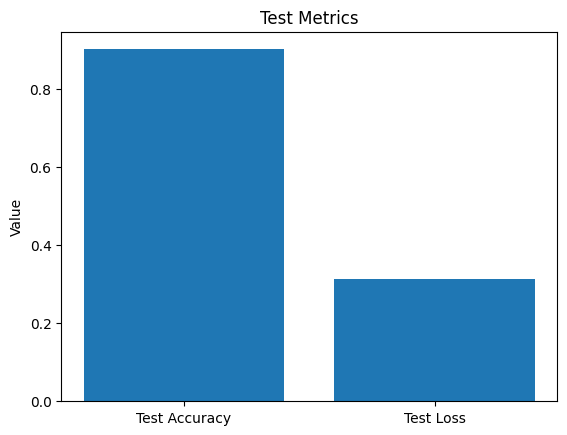

In [ ]:

# Bar plot for test accuracy and loss
plt.bar(['Test Accuracy', 'Test Loss'], [test_accuracy, test_loss])
plt.title('Test Metrics')
plt.ylabel('Value')
plt.show()

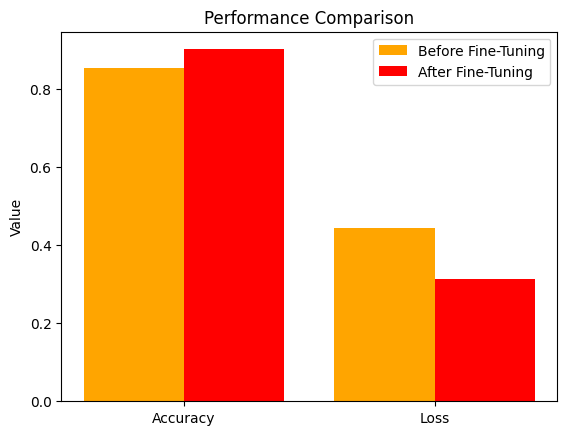

In [ ]:
before_fine_tuning = {'Accuracy': 0.8548, 'Loss': 0.4431}  # Initial model's test results
after_fine_tuning = {'Accuracy': 0.9019, 'Loss': 0.3134}  # Fine-tuned model's test results

# side-by-side comparison
labels = ['Accuracy', 'Loss']
before = [before_fine_tuning['Accuracy'], before_fine_tuning['Loss']]
after = [after_fine_tuning['Accuracy'], after_fine_tuning['Loss']]

x = range(len(labels))

# bar chart
plt.bar(x, before, width=0.4, label='Before Fine-Tuning', align='center', color='orange')
plt.bar([p + 0.4 for p in x], after, width=0.4, label='After Fine-Tuning', align='center', color='red')

# Configure the x-axis
plt.xticks([p + 0.2 for p in x], labels)
plt.title('Performance Comparison')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
model.save('flood_earthquake_classifier_finetuned.h5')
